# Mexico GP 2022 resume

This jupyter notebook contains some insights about the Mexico Grand Prix runned in Autodromo Hermanos Rodriguez on October 30th 2022

## Setup

First let's load some libraries that will be useful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Load information

The information is taken from the website of pitwall.app, the data is the time lap from the drivers and the position, let's load the information of the top 6 drivers: Verstappen, Hamilton, Perez, Russell, Sainz and Leclerc

First lets load the information of Verstappen and Hamilton

In [2]:
info_1_2 = pd.read_html('https://pitwall.app/analysis/compare-lap-times?utf8=%E2%9C%93&season=74&race=1175&main_driver=14&compare_driver=10&button=')[0]

In [3]:
info_1_2.head()

,Lap,Driver,Pos,Time VER,Driver.1,Pos.1,Time HAM,Delta
0,1,#33 Max Verstappen,1st,1:25.253,#44 Lewis Hamilton,2nd,1:26.652,-1.399
1,2,#33 Max Verstappen,1st,1:23.247,#44 Lewis Hamilton,2nd,1:23.313,-0.066
2,3,#33 Max Verstappen,1st,1:23.079,#44 Lewis Hamilton,2nd,1:23.263,-0.184
3,4,#33 Max Verstappen,1st,1:23.566,#44 Lewis Hamilton,2nd,1:23.407,0.159
4,5,#33 Max Verstappen,1st,1:23.226,#44 Lewis Hamilton,2nd,1:23.063,0.163


In [4]:
lap_ver = info_1_2.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time HAM','Delta'])
lap_ver['Pos'] = [int(x[:-2]) for x in list(lap_ver['Pos'])]

In [5]:
lap_ver.head()

,Pos,Time VER
Lap,,
1,1,1:25.253
2,1,1:23.247
3,1,1:23.079
4,1,1:23.566
5,1,1:23.226


In [6]:
lap_ham = info_1_2.set_index('Lap').drop(columns=['Driver','Pos','Time VER','Driver.1','Delta'])
lap_ham = lap_ham.rename(columns={'Pos.1':'Pos'})
lap_ham['Pos'] = [int(x[:-2]) for x in list(lap_ham['Pos'])]

In [7]:
lap_ham.head()

,Pos,Time HAM
Lap,,
1,2,1:26.652
2,2,1:23.313
3,2,1:23.263
4,2,1:23.407
5,2,1:23.063


Now for the third and fourth place Perez and Russell

In [8]:
info_3_4 = pd.read_html('https://pitwall.app/analysis/compare-lap-times?utf8=%E2%9C%93&season=74&race=1175&main_driver=11&compare_driver=20&button=')[0]

In [9]:
info_3_4.head()

,Lap,Driver,Pos,Time PER,Driver.1,Pos.1,Time RUS,Delta
0,1,#11 Sergio PÃ©rez,3rd,1:27.950,#63 George Russell,4th,1:28.892,-0.942
1,2,#11 Sergio PÃ©rez,3rd,1:23.436,#63 George Russell,4th,1:23.760,-0.324
2,3,#11 Sergio PÃ©rez,3rd,1:23.343,#63 George Russell,4th,1:23.656,-0.313
3,4,#11 Sergio PÃ©rez,3rd,1:23.207,#63 George Russell,4th,1:23.549,-0.342
4,5,#11 Sergio PÃ©rez,3rd,1:23.231,#63 George Russell,4th,1:23.266,-0.035


In [10]:
lap_per = info_3_4.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time RUS','Delta'])
lap_per['Pos'] = [int(x[:-2]) for x in list(lap_per['Pos'])]

In [11]:
lap_per.head()

,Pos,Time PER
Lap,,
1,3,1:27.950
2,3,1:23.436
3,3,1:23.343
4,3,1:23.207
5,3,1:23.231


In [12]:
lap_rus = info_3_4.set_index('Lap').drop(columns=['Driver','Pos','Time PER','Driver.1','Delta'])
lap_rus = lap_rus.rename(columns={'Pos.1':'Pos'})
lap_rus['Pos'] = [int(x[:-2]) for x in list(lap_rus['Pos'])]

In [13]:
lap_rus.head()

,Pos,Time RUS
Lap,,
1,4,1:28.892
2,4,1:23.760
3,4,1:23.656
4,4,1:23.549
5,4,1:23.266


Finally lets take the data from the fifth and sixth place Sainz and Leclerc

In [14]:
info_5_6 = pd.read_html('https://pitwall.app/analysis/compare-lap-times?utf8=%E2%9C%93&season=74&race=1175&main_driver=8&compare_driver=3&button=')[0]

In [15]:
info_5_6.head()

,Lap,Driver,Pos,Time SAI,Driver.1,Pos.1,Time LEC,Delta
0,1,#55 Carlos Sainz,5th,1:29.763,#16 Charles Leclerc,6th,1:30.438,-0.675
1,2,#55 Carlos Sainz,5th,1:24.093,#16 Charles Leclerc,6th,1:24.710,-0.617
2,3,#55 Carlos Sainz,5th,1:23.868,#16 Charles Leclerc,6th,1:23.814,0.054
3,4,#55 Carlos Sainz,5th,1:23.881,#16 Charles Leclerc,6th,1:23.858,0.023
4,5,#55 Carlos Sainz,5th,1:23.797,#16 Charles Leclerc,6th,1:24.039,-0.242


In [16]:
lap_sai = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time LEC','Delta'])
lap_sai['Pos'] = [int(x[:-2]) for x in list(lap_sai['Pos'])]

In [17]:
lap_sai.head()

,Pos,Time SAI
Lap,,
1,5,1:29.763
2,5,1:24.093
3,5,1:23.868
4,5,1:23.881
5,5,1:23.797


In [18]:
lap_lec = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos','Time SAI','Delta'])
lap_lec = lap_lec.rename(columns={'Pos.1':'Pos'})
lap_lec['Pos'] = [int(x[:-2]) for x in list(lap_lec['Pos'])]

In [19]:
lap_lec.head()

,Pos,Time LEC
Lap,,
1,6,1:30.438
2,6,1:24.710
3,6,1:23.814
4,6,1:23.858
5,6,1:24.039


## Comparison of times of the first six drivers

The first graph will be a timeseries plot of the lap time of each pilot

In [20]:
lapg = range(1,72)
laptV = list(lap_ver['Time VER'])
laptH = list(lap_ham['Time HAM'])
laptP = list(lap_per['Time PER'])
laptR = list(lap_rus['Time RUS'])
laptS = list(lap_sai['Time SAI'])
laptL = list(lap_lec['Time LEC'])

In [21]:
x = lapg
yV = mdates.datestr2num(laptV)
yH = mdates.datestr2num(laptH)
yP = mdates.datestr2num(laptP)
yR = mdates.datestr2num(laptR)
yS = mdates.datestr2num(laptS)
yL = mdates.datestr2num(laptL)

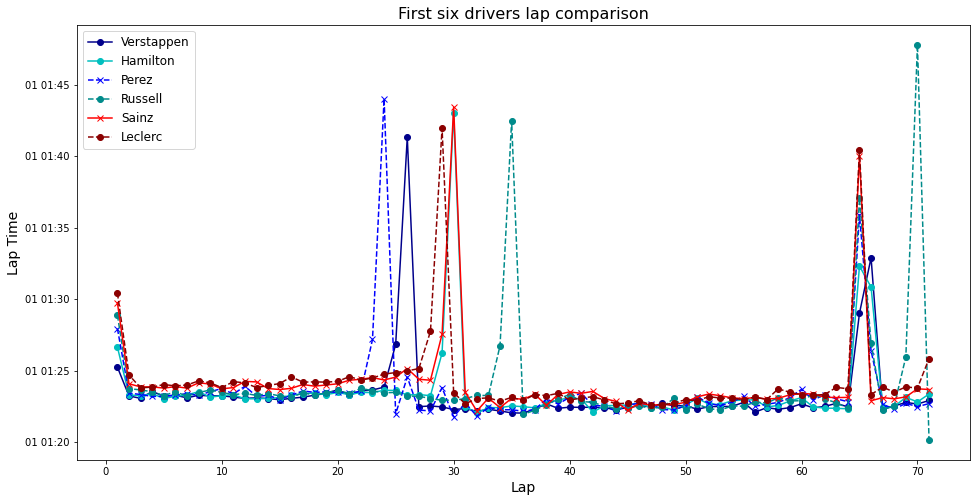

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,yV, color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x,yH,'co-', label='Hamilton')
ax.plot(x,yP, color='blue', linestyle='dashed', marker='x', label='Perez')
ax.plot(x,yR, color='darkcyan', linestyle='dashed', marker='o', label='Russell')
ax.plot(x,yS, color='red', linestyle='solid', marker='x', label='Sainz')
ax.plot(x,yL, color='darkred', linestyle='dashed', marker='o', label='Leclerc')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison.jpeg')

As in every GP, Max was the fastest overall in going to pits, the two laps that it takes to go to change tires is the lowest of the six. We can make a xoom beetween laps 20 an 35.

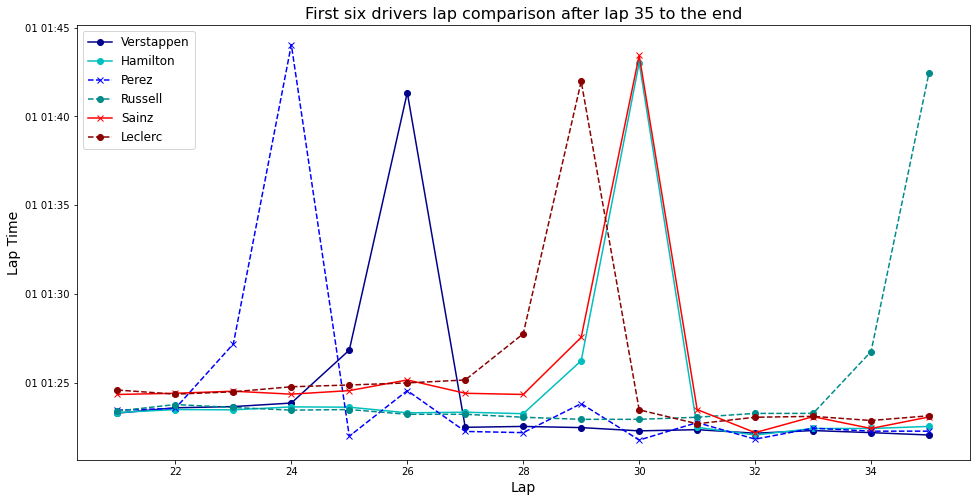

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x[20:35],yV[20:35], color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x[20:35],yH[20:35],'co-', label='Hamilton')
ax.plot(x[20:35],yP[20:35], color='blue', linestyle='dashed', marker='x', label='Perez')
ax.plot(x[20:35],yR[20:35], color='darkcyan', linestyle='dashed', marker='o', label='Russell')
ax.plot(x[20:35],yS[20:35], color='red', linestyle='solid', marker='x', label='Sainz')
ax.plot(x[20:35],yL[20:35], color='darkred', linestyle='dashed', marker='o', label='Leclerc')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison after lap 35 to the end', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison after lap 35 to the end.jpeg')

The Mexico GP of 2022 had only a virtual safety car nearly at the end, it was deployed in laps 65 and 66 so lets remove those times and make a zoom in the time laps after lap 35, to try to check who the fastest was.

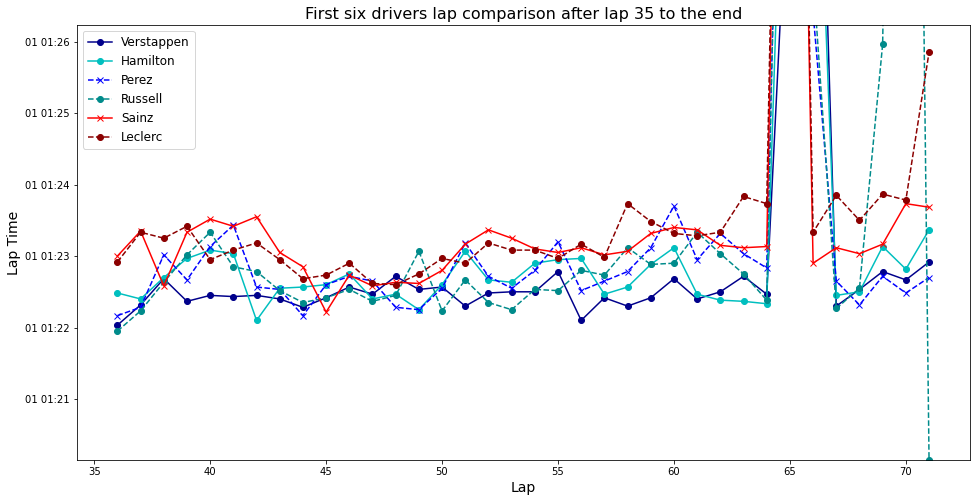

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x[35:],yV[35:], color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x[35:],yH[35:],'co-', label='Hamilton')
ax.plot(x[35:],yP[35:], color='blue', linestyle='dashed', marker='x', label='Perez')
ax.plot(x[35:],yR[35:], color='darkcyan', linestyle='dashed', marker='o', label='Russell')
ax.plot(x[35:],yS[35:], color='red', linestyle='solid', marker='x', label='Sainz')
ax.plot(x[35:],yL[35:], color='darkred', linestyle='dashed', marker='o', label='Leclerc')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_ylim(bottom=yR.min(), top=yH[28])
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison after lap 35 to the end', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison after lap 35 to the end.jpeg')

We can see with this graph that there was no fastest car overall, but in between laps 40 we can see that Verstappen was 1 second faster thatn Hamilton, but after that they alternate their lap times. it can also been seen that the tyres were degradeted as the times went up, but no one wanted to make another change, just Russell to take the fastest lap in the last one with

In [25]:
lap_rus.min()

Pos                1
Time RUS    1:20.153
dtype: object

## Tyres times comparison 

For the tyre time comparison, the times during the virtual safety cars or safety cars will not taken in count.

First let's check the average lap time tyres comparison of Max Verstappen

In [26]:
ver2 = list(range(27,65))+list(range(67,72))
ver_1s = lap_ver.loc[:24]
ver_2m = lap_ver.loc[ver2]

In [27]:
yV_1s = mdates.datestr2num(list(ver_1s['Time VER']))
yV_2m = mdates.datestr2num(list(ver_2m['Time VER']))

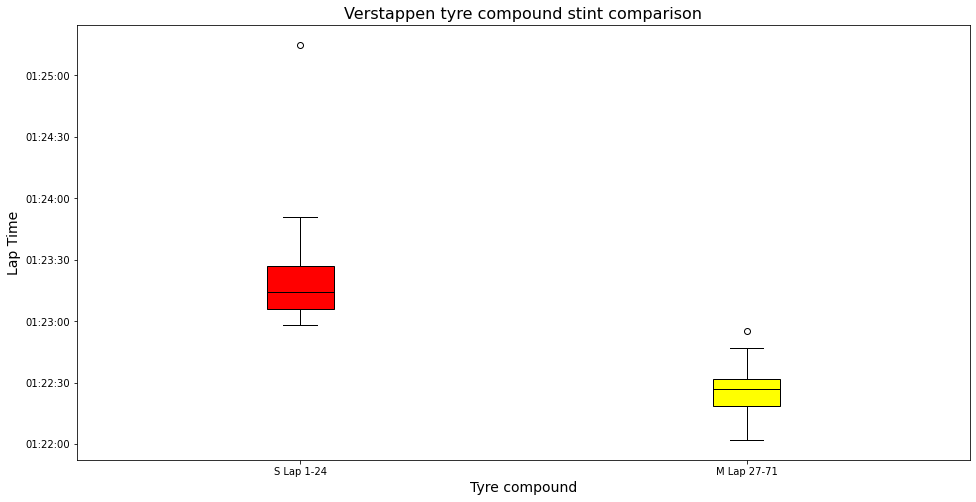

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
bplotV = ax.boxplot((yV_1s,yV_2m),
          patch_artist=True,
          labels = ['S Lap 1-24','M Lap 27-71'],
          medianprops=dict(color='black'))
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Verstappen tyre compound stint comparison', fontsize=16)
bplotV['boxes'][0].set_facecolor('red')
bplotV['boxes'][1].set_facecolor('yellow')
plt.show
fig.savefig('Max Verstappen BP Tyre.jpeg')

Now let's check the times from Hamilton

In [29]:
ham2 = list(range(31,65))+list(range(67,72))
ham_1m = lap_ham.loc[:28]
ham_2h = lap_ham.loc[ham2]

In [30]:
yH_1m = mdates.datestr2num(list(ham_1m['Time HAM']))
yH_2h = mdates.datestr2num(list(ham_2h['Time HAM']))

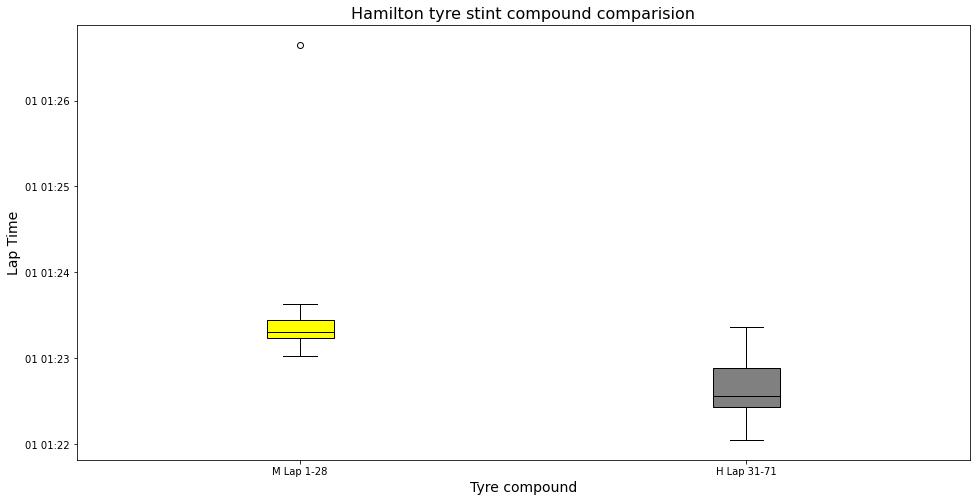

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
bplotH = ax.boxplot((yH_1m, yH_2h),
          patch_artist=True,
          labels = ['M Lap 1-28','H Lap 31-71'],
          medianprops=dict(color='black'))
bplotH['boxes'][0].set_facecolor('yellow')
bplotH['boxes'][1].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Hamilton tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Hamilton BP Tyre.jpeg')

Next one is the lap time average of Perez

In [32]:
per2 = list(range(25,65))+list(range(67,72))
per_1s = lap_per.loc[:22]
per_2m = lap_per.loc[per2]

In [33]:
yP_1s = mdates.datestr2num(list(per_1s['Time PER']))
yP_2m = mdates.datestr2num(list(per_2m['Time PER']))

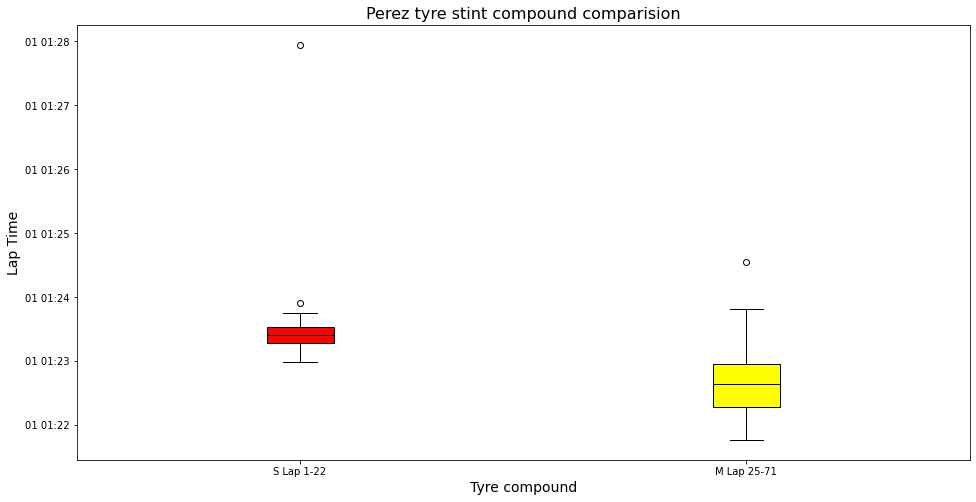

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
bplotP = ax.boxplot((yP_1s, yP_2m),
          patch_artist=True,
          labels = ['S Lap 1-22','M Lap 25-71'],
          medianprops=dict(color='black'))
bplotP['boxes'][0].set_facecolor('red')
bplotP['boxes'][1].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Perez tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Perez BP Tyre.jpeg')

Now for Russell

In [35]:
rus2 = list(range(36,65))+list(range(67,69))
rus_1m = lap_rus.loc[:33]
rus_2h = lap_rus.loc[rus2]

In [36]:
yR_1m = mdates.datestr2num(list(rus_1m['Time RUS']))
yR_2h = mdates.datestr2num(list(rus_2h['Time RUS']))

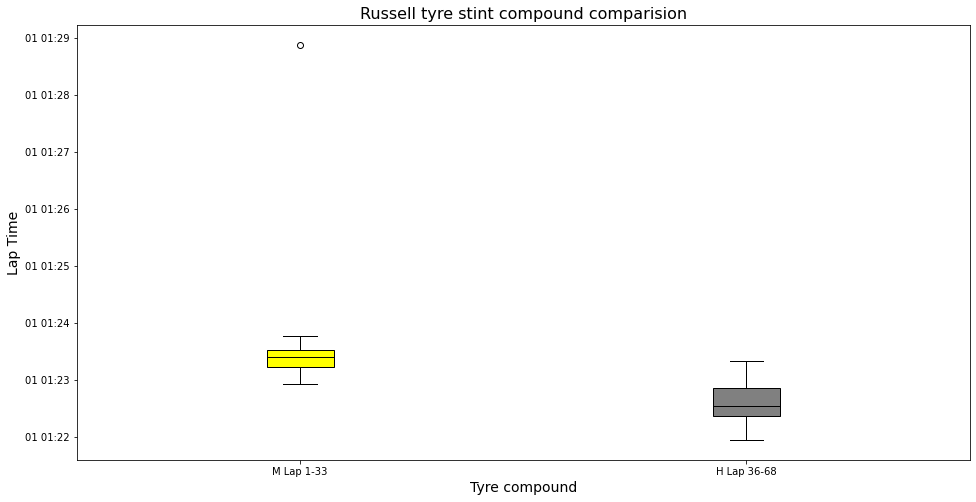

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
bplotR = ax.boxplot((yR_1m,yR_2h),
          patch_artist=True,
          labels = ['M Lap 1-33','H Lap 36-68'],
          medianprops=dict(color='black'))
bplotR['boxes'][0].set_facecolor('yellow')
bplotR['boxes'][1].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Russell tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Russell BP Tyre.jpeg')

Now let's check for the average lap time of Sainz

In [38]:
sai2 = list(range(31,65))+list(range(66,72))
sai_1s = lap_sai.loc[:28]
sai_2m = lap_sai.loc[sai2]

In [39]:
yS_1s = mdates.datestr2num(list(sai_1s['Time SAI']))
yS_2m = mdates.datestr2num(list(sai_2m['Time SAI']))

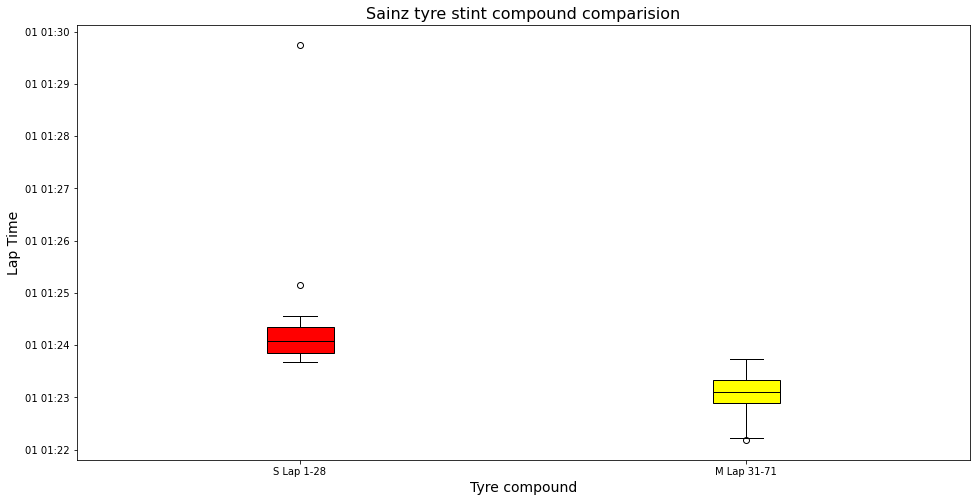

In [40]:
fig, ax = plt.subplots(figsize=(16,8))
bplotS = ax.boxplot((yS_1s, yS_2m),
          patch_artist=True,
          labels = ['S Lap 1-28','M Lap 31-71'],
          medianprops=dict(color='black'))
bplotS['boxes'][0].set_facecolor('red')
bplotS['boxes'][1].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Sainz tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Sainz BP Tyre.jpeg')

Finally the average lap time of Leclerc

In [41]:
lec2 = list(range(30,65))+list(range(66,72))
lec_1s = lap_lec.loc[:27]
lec_2m = lap_lec.loc[lec2]

In [42]:
yL_1s = mdates.datestr2num(list(lec_1s['Time LEC']))
yL_2m = mdates.datestr2num(list(lec_2m['Time LEC']))

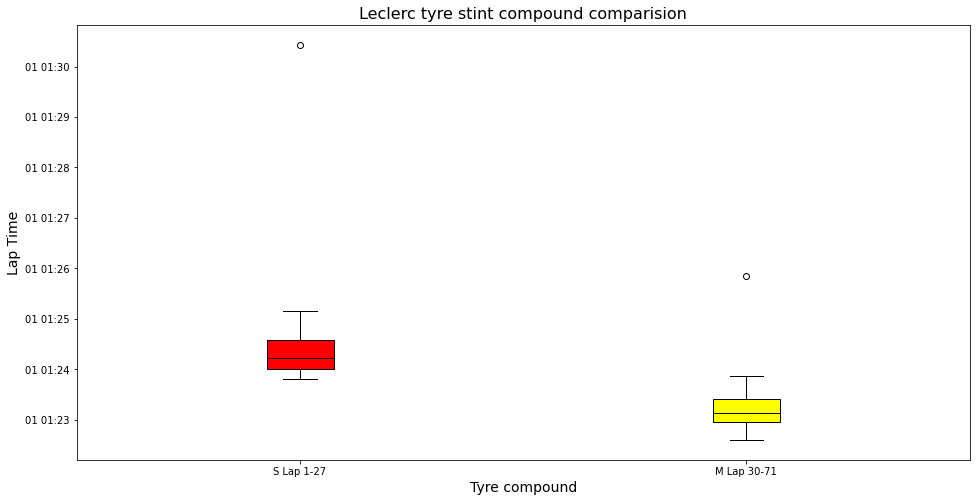

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
bplotL = ax.boxplot((yL_1s,yL_2m),
          patch_artist=True,
          labels = ['S Lap 1-27','M Lap 30-71'],
          medianprops=dict(color='black'))
bplotL['boxes'][0].set_facecolor('red')
bplotL['boxes'][1].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Leclerc tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Leclerc Sainz BP Tyre.jpeg')

# Comparison time laps between pilots

Finally let's make a comparison between the pilots, the first stint is from lap 1 to lap 30, both Redbulls and Ferraris had soft tyres and Mercedes medium, the second stint between laps 31-71, Redbull and Ferarri with mediums while Mercedes with hard tyres
The times doesn't take in count the virtual safety cars time laps.

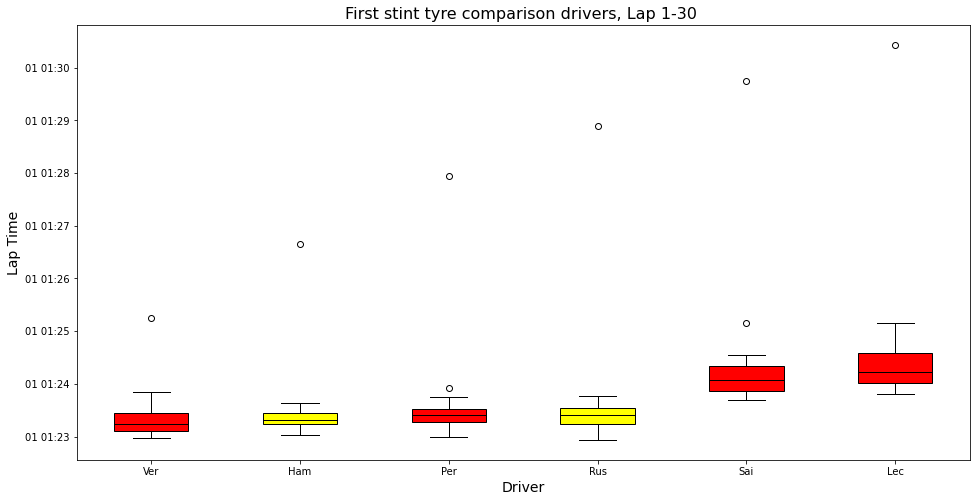

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
bplot1 = ax.boxplot((yV_1s,yH_1m,yP_1s,yR_1m,yS_1s,yL_1s),
          patch_artist=True,
          labels = ['Ver','Ham','Per','Rus','Sai','Lec'],
          medianprops=dict(color='black'))
bplot1['boxes'][0].set_facecolor('red')
bplot1['boxes'][1].set_facecolor('yellow')
bplot1['boxes'][2].set_facecolor('red')
bplot1['boxes'][3].set_facecolor('yellow')
bplot1['boxes'][4].set_facecolor('red')
bplot1['boxes'][5].set_facecolor('red')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('First stint tyre comparison drivers, Lap 1-30 ', fontsize=16)
plt.show
fig.savefig('First stint tyre.jpeg')

Now for the second stint which began at lap 16

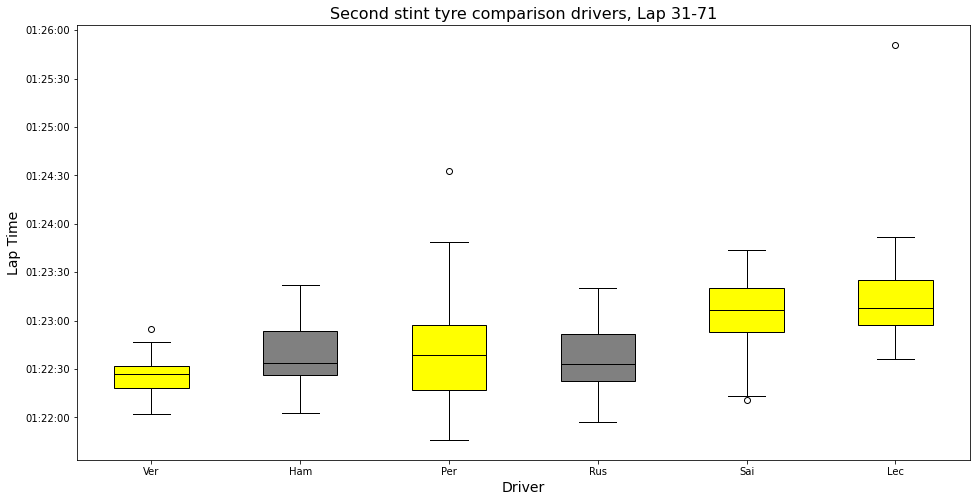

In [45]:
fig, ax = plt.subplots(figsize=(16,8))
bplot2 = ax.boxplot((yV_2m,yH_2h,yP_2m,yR_2h,yS_2m,yL_2m),
          patch_artist=True,
          labels = ['Ver','Ham','Per','Rus','Sai','Lec'],
          medianprops=dict(color='black'))
bplot2['boxes'][0].set_facecolor('yellow')
bplot2['boxes'][1].set_facecolor('gray')
bplot2['boxes'][2].set_facecolor('yellow')
bplot2['boxes'][3].set_facecolor('gray')
bplot2['boxes'][4].set_facecolor('yellow')
bplot2['boxes'][5].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Second stint tyre comparison drivers, Lap 31-71', fontsize=16)
plt.show
fig.savefig('Second stint tyre comparison.jpeg')

And finally the third and last stint

# Timeseries for race position

Finally a time series plot for the position of the first 6 drivers.

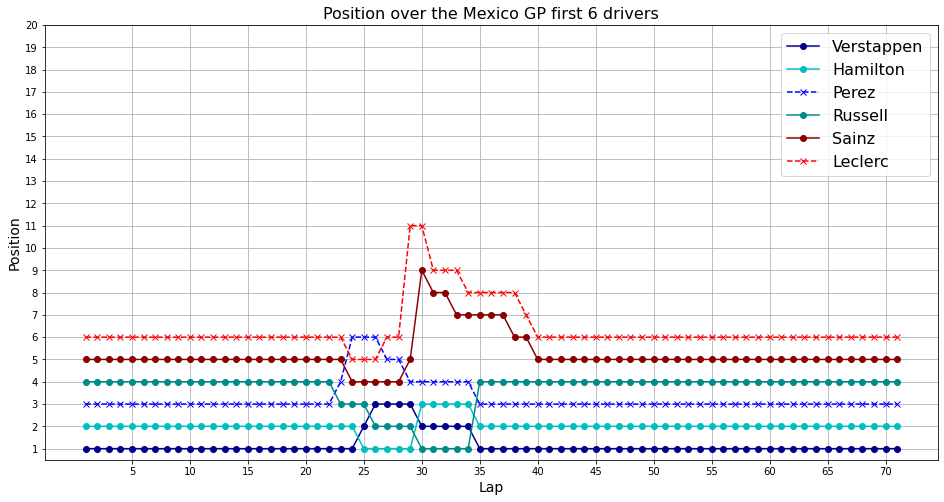

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, lap_ver['Pos'], color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x, lap_ham['Pos'], 'co-', label='Hamilton')
ax.plot(x, lap_per['Pos'], color='blue', linestyle='dashed', marker='x', label='Perez')
ax.plot(x, lap_rus['Pos'], color='darkcyan', linestyle='solid', marker='o', label='Russell')
ax.plot(x, lap_sai['Pos'], color='darkred', linestyle='solid', marker='o', label='Sainz')
ax.plot(x, lap_lec['Pos'], color='red', linestyle='dashed', marker='x', label='Leclerc')
ax.set_ylabel('Position', fontsize=14)
ax.set_xlabel('Lap', fontsize=14)
ax.set_title('Position over the Mexico GP first 6 drivers', fontsize=16)
ax.legend(loc='upper right', fontsize=16)
plt.yticks(list(range(1,21)))
plt.xticks(list(range(5,72,5)))
ax.grid(True)
plt.show()
fig.savefig('Position over the Singapore GP first 6 drivers.jpeg')